In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [42]:
folder_path = '../'
files = os.listdir(folder_path)
txt_files = [file for file in files if file.endswith('.txt')]
txt_files.sort()
txt_files.pop()

#create headers
headers = ['loan_id','upb','note_rate','borrower_fico','coborrower_fico','combined_fico','state','dti','ltv','maturity_date','loan_term','property_type']
df = pd.DataFrame([], columns=headers)

#concat all 16 datasets of mortgages 
for file in txt_files:
    file_path = os.path.join(folder_path,file)
    df_temp = pd.read_csv(file_path,sep='|',names=headers)
    df = pd.concat([df,df_temp],axis=0,ignore_index=True)
df = df.drop(0)
df

/var/folders/1l/1_77chk10c58jd2y78wc_z_80000gn/T/ipykernel_92996/3139987701.py:14: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path,sep='|',names=headers)


,loan_id,upb,note_rate,borrower_fico,coborrower_fico,combined_fico,state,dti,ltv,maturity_date,loan_term,property_type
1,000128090409,171000.00,2.990,808,814,811,NY,47,48,102051,360,SF
2,000128090410,450000.00,2.875,803,NaN,803,NY,48,46,092051,360,SF
3,000128090411,604000.00,2.990,762,792,777,NY,45,55,102051,360,SF
4,000128090412,300000.00,2.250,766,NaN,766,NY,23,35,042051,360,SF
5,000128090420,205000.00,3.250,794,774,784,KY,21,69,102051,360,PU
...,...,...,...,...,...,...,...,...,...,...,...,...
1542130,134439941,200000.0,6.0,654.0,NaN,654,TN,42.0,65,92052,360,SF
1542131,134439943,576000.0,5.375,765.0,781.0,773,NY,28.0,80,92052,360,SF
1542132,134439944,440000.0,6.325,742.0,689.0,715,MN,49.0,80,92052,360,SF
1542133,134439945,152000.0,5.375,717.0,NaN,717,CA,39.0,70,92052,360,CO


In [43]:
df = df.sample(n=100000, random_state=5)

In [44]:
df.describe()

,loan_id,upb,note_rate,borrower_fico,coborrower_fico,combined_fico,state,dti,ltv,maturity_date,loan_term,property_type
count,100000,100000.0,100000.00,99970.0,42893.0,100000,100000,99979.0,100000,99999.0,100000,100000
unique,100000,1545.0,2178.00,463.0,444.0,422,52,118.0,181,301.0,100,5
top,134369415,200000.0,3.25,801.0,801.0,801,CA,44.0,80,122051.0,360,SF
freq,1,966.0,7247.00,1283.0,690.0,1115,15260,4275.0,13893,8274.0,72183,61306


In [45]:
df1 = df[['loan_id','upb','note_rate','combined_fico','dti','ltv','maturity_date','loan_term']]

columns_to_change = ['loan_id','upb','note_rate','combined_fico','dti','ltv','maturity_date','loan_term']
for col in columns_to_change:
    df1[col] = df1[col].astype(float)

df1.corr()

/var/folders/1l/1_77chk10c58jd2y78wc_z_80000gn/T/ipykernel_92996/3427902424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].astype(float)


,loan_id,upb,note_rate,combined_fico,dti,ltv,maturity_date,loan_term
loan_id,1.000000,0.069104,0.770112,-0.074089,0.107886,0.153531,-0.417052,0.159232
upb,0.069104,1.000000,0.056314,0.064250,0.134777,0.270557,-0.013991,0.254808
note_rate,0.770112,0.056314,1.000000,-0.178744,0.159153,0.299020,-0.087332,0.416504
combined_fico,-0.074089,0.064250,-0.178744,1.000000,-0.174982,-0.128533,0.037734,-0.103560
dti,0.107886,0.134777,0.159153,-0.174982,1.000000,0.177188,-0.026470,0.171106
ltv,0.153531,0.270557,0.299020,-0.128533,0.177188,1.000000,-0.016164,0.401146
maturity_date,-0.417052,-0.013991,-0.087332,0.037734,-0.026470,-0.016164,1.000000,-0.022825
loan_term,0.159232,0.254808,0.416504,-0.103560,0.171106,0.401146,-0.022825,1.000000


In [46]:
#filter dataframe to only entries which are possible to be class1
class1 = df1.loc[(df1["note_rate"]>=5.0)&(df1["note_rate"]<=7.0)&(df1["combined_fico"]>=640)&(df1["combined_fico"]<=745)&(df1["dti"]>=35)&(df1["dti"]<=50)&(df1["ltv"]>=75)&(df1["ltv"]<=85)]
class1

,loan_id,upb,note_rate,combined_fico,dti,ltv,maturity_date,loan_term
1378318,133882084.0,128000.0,5.125,737.0,43.0,80.0,72052.0,360.0
1418029,134071351.0,150000.0,6.625,718.0,42.0,75.0,62052.0,360.0
1266679,133436753.0,432000.0,5.000,697.0,48.0,80.0,62052.0,360.0
1499180,134361316.0,344000.0,5.750,727.0,49.0,75.0,92052.0,360.0
1511390,134383843.0,375000.0,5.820,709.0,42.0,75.0,82052.0,360.0
...,...,...,...,...,...,...,...,...
1347464,133826039.0,314000.0,5.625,714.0,38.0,80.0,72052.0,360.0
1516094,134392464.0,336000.0,6.500,726.0,45.0,80.0,92052.0,360.0
1459898,134147009.0,148000.0,6.000,699.0,40.0,80.0,72052.0,360.0
1318442,133531621.0,416000.0,5.750,718.0,47.0,80.0,62052.0,360.0


In [47]:
class1.corr()

,loan_id,upb,note_rate,combined_fico,dti,ltv,maturity_date,loan_term
loan_id,1.000000,0.015017,0.383153,0.089628,0.073582,0.013382,0.732217,-0.046621
upb,0.015017,1.000000,-0.094849,0.036865,0.106540,0.035211,0.015379,0.043583
note_rate,0.383153,-0.094849,1.000000,-0.182732,-0.023801,-0.055181,0.368699,0.138554
combined_fico,0.089628,0.036865,-0.182732,1.000000,0.037203,0.098184,0.062850,0.032492
dti,0.073582,0.106540,-0.023801,0.037203,1.000000,0.039923,0.076852,0.042367
ltv,0.013382,0.035211,-0.055181,0.098184,0.039923,1.000000,0.000242,0.021601
maturity_date,0.732217,0.015379,0.368699,0.062850,0.076852,0.000242,1.000000,-0.056924
loan_term,-0.046621,0.043583,0.138554,0.032492,0.042367,0.021601,-0.056924,1.000000


In [48]:
class1.describe()

,loan_id,upb,note_rate,combined_fico,dti,ltv,maturity_date,loan_term
count,1.481000e+03,1.481000e+03,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000
mean,1.338509e+08,3.394821e+05,5.781845,706.078325,43.238352,79.182309,73409.014855,357.909521
std,4.468933e+05,1.587091e+05,0.461978,26.470010,4.350277,2.799708,13684.878163,17.970394
min,1.290282e+08,2.400000e+04,5.000000,640.000000,35.000000,75.000000,32044.000000,180.000000
25%,1.334903e+08,2.240000e+05,5.490000,687.000000,40.000000,77.000000,62052.000000,360.000000
50%,1.338990e+08,3.190000e+05,5.750000,709.000000,44.000000,80.000000,72052.000000,360.000000
75%,1.341489e+08,4.310000e+05,6.000000,728.000000,47.000000,80.000000,82052.000000,360.000000
max,1.344393e+08,1.050000e+06,7.000000,745.000000,50.000000,85.000000,122051.000000,360.000000


[]

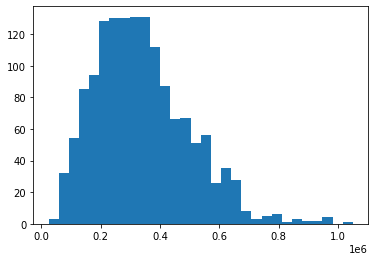

In [49]:
plt.hist(class1["upb"],bins=30)
plt.plot()

# Attempting to find relationships between UPB and State

In [51]:
ny = df.loc[(df["state"]=="NY")]
ny

,loan_id,upb,note_rate,borrower_fico,coborrower_fico,combined_fico,state,dti,ltv,maturity_date,loan_term,property_type
705686,130589153,301000.0,2.75,721.0,736.0,728,NY,41.0,45,112051.0,360,SF
657734,130505281,284000.0,3.25,690.0,NaN,690,NY,38.0,58,12052.0,360,SF
235009,128834423,160000.0,3.25,781.0,NaN,781,NY,23.0,97,122051.0,360,SF
1174149,133167303,110000.0,4.75,641.0,715.0,678,NY,21.0,67,52052.0,360,SF
874293,131488336,568000.0,3.172,703.0,779.0,741,NY,28.0,80,22052,360,SF
...,...,...,...,...,...,...,...,...,...,...,...,...
713994,130603628,380000.0,3.25,725.0,NaN,725,NY,34.0,80,12052.0,360,CP
200841,128430366,309000.0,2.875,780.0,746.0,763,NY,34.0,69,102041.0,240,SF
775527,131316145,290000.0,3.125,777.0,788.0,782,NY,24.0,75,22052.0,360,SF
424446,129663423,164000.0,3.375,749.0,NaN,749,NY,39.0,80,12052,360,SF


In [52]:
ny.describe()

,loan_id,upb,note_rate,borrower_fico,coborrower_fico,combined_fico,state,dti,ltv,maturity_date,loan_term,property_type
count,3039,3039.0,3039.000,3039.0,1319.0,3039,3039,3038.0,3039,3039.0,3039,3039
unique,3039,791.0,155.000,295.0,232.0,288,1,84.0,142,136.0,34,5
top,130589153,400000.0,2.875,797.0,801.0,797,NY,49.0,80,122051.0,360,SF
freq,1,30.0,251.000,45.0,26.0,45,3039,148.0,512,232.0,2072,2298


In [54]:
cols = ['loan_id','upb','note_rate','combined_fico','dti','ltv','maturity_date','loan_term']
for col in cols:
    ny[col] = ny[col].astype(float)
ny.corr()

/var/folders/1l/1_77chk10c58jd2y78wc_z_80000gn/T/ipykernel_92996/2459937365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny[col] = ny[col].astype(float)


,loan_id,upb,note_rate,combined_fico,dti,ltv,maturity_date,loan_term
loan_id,1.000000,0.049881,0.708743,-0.051394,0.068213,0.100869,-0.425587,0.161458
upb,0.049881,1.000000,0.059961,0.005411,0.149348,0.237023,-0.040364,0.283657
note_rate,0.708743,0.059961,1.000000,-0.176317,0.108808,0.261925,-0.056964,0.418919
combined_fico,-0.051394,0.005411,-0.176317,1.000000,-0.209292,-0.118328,0.036277,-0.105368
dti,0.068213,0.149348,0.108808,-0.209292,1.000000,0.104638,-0.045913,0.160302
ltv,0.100869,0.237023,0.261925,-0.118328,0.104638,1.000000,-0.001921,0.424160
maturity_date,-0.425587,-0.040364,-0.056964,0.036277,-0.045913,-0.001921,1.000000,-0.002374
loan_term,0.161458,0.283657,0.418919,-0.105368,0.160302,0.424160,-0.002374,1.000000


In [55]:
ny.describe()

,loan_id,upb,note_rate,combined_fico,dti,ltv,maturity_date,loan_term
count,3.039000e+03,3.039000e+03,3039.000000,3039.000000,3038.000000,3039.000000,3039.000000,3039.000000
mean,1.313095e+08,3.370474e+05,3.547677,753.699572,36.852205,66.290885,68201.067127,313.272787
std,1.978680e+06,1.895749e+05,0.961282,43.555307,9.464118,19.306806,37341.006702,77.260456
min,1.280904e+08,4.400000e+04,1.750000,574.000000,4.000000,7.000000,12030.000000,96.000000
25%,1.296687e+08,1.860000e+05,2.875000,725.000000,30.000000,54.000000,32052.000000,240.000000
50%,1.313812e+08,3.030000e+05,3.250000,762.000000,38.000000,70.000000,62052.000000,360.000000
75%,1.331617e+08,4.550000e+05,3.990000,789.000000,45.000000,80.000000,102051.000000,360.000000
max,1.344399e+08,1.200000e+06,7.000000,829.000000,60.000000,97.000000,122051.000000,360.000000


In [59]:
df.loc[(df["ltv"].astype(float)<=60)]

,loan_id,upb,note_rate,borrower_fico,coborrower_fico,combined_fico,state,dti,ltv,maturity_date,loan_term,property_type
1096517,132795971,176000.0,3.99,706.0,NaN,706,CA,31.0,56,42052.0,360,SF
1257597,133420231,134000.0,4.125,762.0,NaN,762,MI,40.0,54,62052.0,360,SF
689649,130561037,120000.0,3.0,659.0,NaN,659,GA,27.0,55,12037.0,180,SF
1456516,134140934,186000.0,4.5,787.0,798.0,792,CA,42.0,29,82037.0,180,SF
790490,131342284,123000.0,2.99,796.0,760.0,778,FL,46.0,33,22052.0,360,SF
...,...,...,...,...,...,...,...,...,...,...,...,...
1110286,132820989,186000.0,4.875,682.0,NaN,682,OR,12.0,50,52052.0,360,SF
103507,128265770,228000.0,1.99,801.0,NaN,801,FL,30.0,42,112036.0,180,PU
1493899,134351619,127000.0,4.75,768.0,NaN,768,ID,9.0,44,102052.0,360,SF
366845,129068455,333000.0,2.75,800.0,782.0,791,NJ,37.0,52,112051.0,360,SF


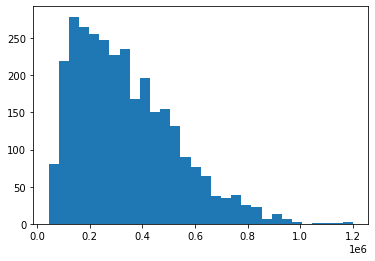

In [65]:
plt.hist(ny["upb"],bins=30)
plt.show()

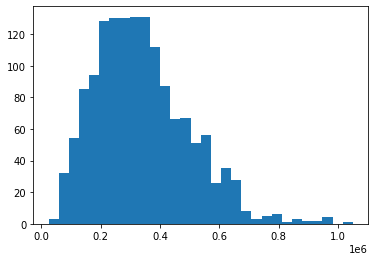

In [66]:
plt.hist(class1["upb"],bins=30)
plt.show()

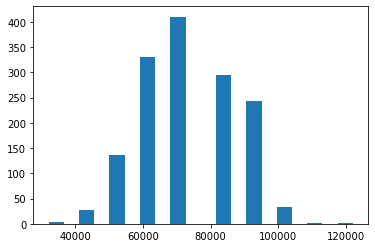

In [69]:
plt.hist(class1["maturity_date"],bins=20)
plt.show()